In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [2]:
# importing data
youtube=pd.read_csv('/Users/hlind/Downloads/YouTubeChannels_Python.csv')

In [3]:
youtube.head()

,Rank,Gr2de,Channel name,Video Uploads,Subscribers,Video views
0,1st,0,Zee TV,82757,18752951,20869786591
1,2nd,0,T-Series,12661,61196302,47548839843
2,3rd,0,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,0,SET India,27323,31180559,22675948293
4,5th,0,WWE,36756,32852346,26273668433


In [4]:
# keeping only gr2de and video views
yt=youtube[['Gr2de', 'Video views']]

In [5]:
yt.head()

,Gr2de,Video views
0,0,20869786591
1,0,47548839843
2,0,9793305082
3,0,22675948293
4,0,26273668433


In [6]:
# recoding
def recode (series): 
    if series == 0: 
        return "A plusplus"
    if series == 1: 
        return "A plus"
    if series == 2: 
        return "A"
    if series == 3:
        return "B plus"
yt['GradeR']=yt['Gr2de'].apply(recode)

/var/folders/xf/chkgnkz55mvbhswk6vjbb9680000gn/T/ipykernel_4131/1450204937.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yt['GradeR']=yt['Gr2de'].apply(recode)


In [7]:
yt.head()

,Gr2de,Video views,GradeR
0,0,20869786591,A plusplus
1,0,47548839843,A plusplus
2,0,9793305082,A plusplus
3,0,22675948293,A plusplus
4,0,26273668433,A plusplus


/var/folders/xf/chkgnkz55mvbhswk6vjbb9680000gn/T/ipykernel_4131/2491549440.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yt['Video views'])


<AxesSubplot: xlabel='Video views', ylabel='Density'>

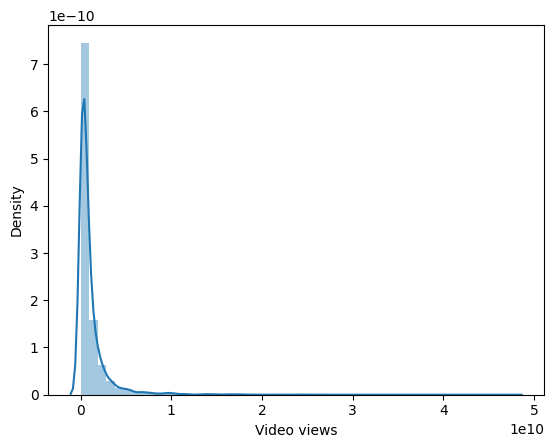

In [8]:
# checking normality
sns.distplot(yt['Video views'])

In [9]:
# positively skewed - square rooting data
yt['Video viewsSQRT']=np.sqrt(yt['Video views'])

/var/folders/xf/chkgnkz55mvbhswk6vjbb9680000gn/T/ipykernel_4131/4238088547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yt['Video viewsSQRT']=np.sqrt(yt['Video views'])


In [10]:
yt.head()

,Gr2de,Video views,GradeR,Video viewsSQRT
0,0,20869786591,A plusplus,144463.789896
1,0,47548839843,A plusplus,218056.964674
2,0,9793305082,A plusplus,98961.129147
3,0,22675948293,A plusplus,150585.352186
4,0,26273668433,A plusplus,162091.543373


/var/folders/xf/chkgnkz55mvbhswk6vjbb9680000gn/T/ipykernel_4131/4040586703.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yt['Video viewsSQRT'])


<AxesSubplot: xlabel='Video viewsSQRT', ylabel='Density'>

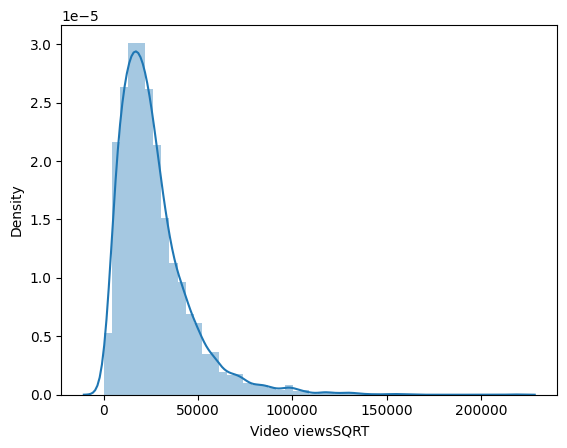

In [11]:
sns.distplot(yt['Video viewsSQRT'])

In [12]:
# attempting log
yt['Video viewsLOG']=np.log(yt['Video views'])

/var/folders/xf/chkgnkz55mvbhswk6vjbb9680000gn/T/ipykernel_4131/1109089248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yt['Video viewsLOG']=np.log(yt['Video views'])


In [13]:
yt.head()

,Gr2de,Video views,GradeR,Video viewsSQRT,Video viewsLOG
0,0,20869786591,A plusplus,144463.789896,23.761568
1,0,47548839843,A plusplus,218056.964674,24.585023
2,0,9793305082,A plusplus,98961.129147,23.004965
3,0,22675948293,A plusplus,150585.352186,23.844571
4,0,26273668433,A plusplus,162091.543373,23.991833


/var/folders/xf/chkgnkz55mvbhswk6vjbb9680000gn/T/ipykernel_4131/4137858531.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yt['Video viewsLOG'])


<AxesSubplot: xlabel='Video viewsLOG', ylabel='Density'>

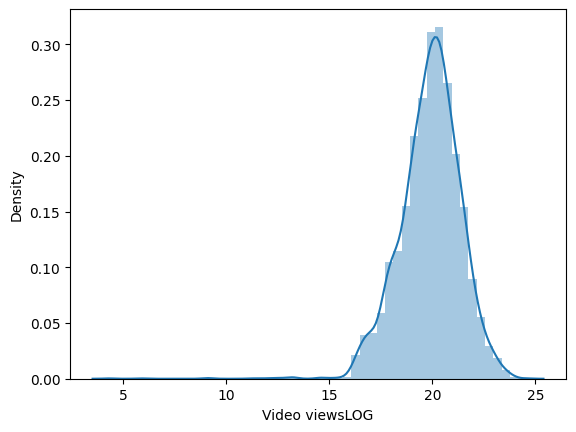

In [14]:
sns.distplot(yt['Video viewsLOG'])

In [15]:
# testing homogeneity
scipy.stats.bartlett(yt['Video viewsLOG'], yt['Gr2de'])

BartlettResult(statistic=4642.606911455518, pvalue=0.0)

In [16]:
# pvalue <.05 - variance unequal
stats.f_oneway(yt['Video viewsLOG'][yt['GradeR']=='A plusplus'],
                   yt['Video viewsLOG'][yt['GradeR']=='A plus'],
               yt['Video viewsLOG'][yt['GradeR']=='A'],
               yt['Video viewsLOG'][yt['GradeR']=='B plus'])

F_onewayResult(statistic=283.85148674568444, pvalue=3.895240835935201e-170)

In [17]:
# determining post hoc
postHoc=MultiComparison(yt['Video viewsLOG'], yt['Gr2de'])
postHocResults=postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -1.5233 0.0085   -2.76 -0.2865   True
     0      2   -3.103    0.0 -4.2146 -1.9913   True
     0      3  -4.1291    0.0 -5.2399 -3.0184   True
     1      2  -1.5797    0.0  -2.133 -1.0264   True
     1      3  -2.6059    0.0 -3.1573 -2.0544   True
     2      3  -1.0262    0.0 -1.1278 -0.9245   True
----------------------------------------------------


In [18]:
# determining mean
yt.groupby('GradeR').mean()

,Gr2de,Video views,Video viewsSQRT,Video viewsLOG
GradeR,,,,
A,2.0,1.676207e+09,34678.089608,20.475580
A plus,1.0,6.053121e+09,70951.341638,22.055279
A plusplus,0.0,2.119909e+10,139631.341341,23.578544
B plus,3.0,5.265217e+08,19943.101566,19.449400


In [19]:
# grades are significantly different with higher grades receiving greater reviews